# Training the model
In this notebook, we train the model.

In [1]:
from unityagents import UnityEnvironment
import numpy as np

import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Start the environment
env = UnityEnvironment(file_name="./Banana_Windows_x86_64/Banana.exe", no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [13]:
env.close()

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# print(brain_name)

# Network training code
This should be moved to separate file.

In [4]:
def train_dqn(num_episodes=100, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """
    Deep Q-Learning.
    TODO: move to own trainer file.
    """
    scores = []
    scores_window = deque(maxlen=100)
    eps = eps_start
    for episode in range(1, num_episodes+1):
        env_info = env.reset()[brain_name]
        state = env_info.vector_observations[0] # reset environment for new episode
        score = 0 # reset score for current episode
        for t in range(max_t):
            # choose action, execute it, and get the reward, next_state
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            # next_state, reward, done, _ = pass
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)
        scores.append(score)
        eps = max(eps_end, eps_decay*eps)
        if episode % 10 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(scores_window)))
    return scores

In [5]:
# metadata
state_size = 37
action_size = 4

# Run some timing tests for default fully connected network
Looks like (perhaps not surprisingly) that CPU is actually faster. Using headless mode saves about 70sec of time per 100 iterations.

In [6]:
import time
start = time.time()
from dql.agent import Agent
agent = Agent(state_size, action_size, 1234, use_gpu=True)
print(agent.device)
scores = train_dqn()
print(time.time() - start)

cuda:0
Episode 100	Average Score: 0.75
148.87517666816711


In [7]:
import time
start = time.time()
from dql.agent import Agent
agent = Agent(state_size, action_size, 1234, use_gpu=False)
print(agent.device)
scores = train_dqn()
print(time.time() - start)

cpu
Episode 100	Average Score: 0.46
82.20317220687866


# Let's do actual testing run with more episodes...

In [8]:
from dql.agent import Agent

In [9]:
agent = Agent(state_size, action_size, 1234, use_gpu=False)

In [10]:
scores = train_dqn(num_episodes=2000)

Episode 10	Average Score: -0.20
Episode 20	Average Score: 0.05
Episode 30	Average Score: -0.07
Episode 40	Average Score: -0.07
Episode 50	Average Score: -0.16
Episode 60	Average Score: -0.08
Episode 70	Average Score: -0.09
Episode 80	Average Score: -0.06
Episode 90	Average Score: -0.06
Episode 100	Average Score: 0.08
Episode 110	Average Score: 0.29
Episode 120	Average Score: 0.38
Episode 130	Average Score: 0.55
Episode 140	Average Score: 0.95
Episode 150	Average Score: 1.29
Episode 160	Average Score: 1.59
Episode 170	Average Score: 1.99
Episode 180	Average Score: 2.46
Episode 190	Average Score: 2.95
Episode 200	Average Score: 3.53
Episode 210	Average Score: 3.86
Episode 220	Average Score: 4.28
Episode 230	Average Score: 4.68
Episode 240	Average Score: 4.80
Episode 250	Average Score: 5.15
Episode 260	Average Score: 5.69
Episode 270	Average Score: 6.00
Episode 280	Average Score: 6.11
Episode 290	Average Score: 6.40
Episode 300	Average Score: 6.56
Episode 310	Average Score: 6.86
Episode 3

In [8]:
# Double DQN
scores = train_dqn(num_episodes=500)

Episode 10	Average Score: 0.10
Episode 20	Average Score: -0.10
Episode 30	Average Score: -0.23
Episode 40	Average Score: -0.03
Episode 50	Average Score: 0.00
Episode 60	Average Score: 0.32
Episode 70	Average Score: 0.50
Episode 80	Average Score: 0.55
Episode 90	Average Score: 0.60
Episode 100	Average Score: 0.72
Episode 110	Average Score: 0.90
Episode 120	Average Score: 1.04
Episode 130	Average Score: 1.39
Episode 140	Average Score: 1.65
Episode 150	Average Score: 2.14
Episode 160	Average Score: 2.44
Episode 170	Average Score: 2.69
Episode 180	Average Score: 3.14
Episode 190	Average Score: 3.56
Episode 200	Average Score: 3.98
Episode 210	Average Score: 4.35
Episode 220	Average Score: 4.94
Episode 230	Average Score: 5.30
Episode 240	Average Score: 5.75
Episode 250	Average Score: 5.93
Episode 260	Average Score: 6.33
Episode 270	Average Score: 6.67
Episode 280	Average Score: 7.07
Episode 290	Average Score: 7.37
Episode 300	Average Score: 7.76
Episode 310	Average Score: 8.08
Episode 320	Av

In [8]:
# Double Dueling DQN
scores = train_dqn(num_episodes=1000)

Episode 10	Average Score: -0.50
Episode 20	Average Score: -0.45
Episode 30	Average Score: -0.37
Episode 40	Average Score: -0.12
Episode 50	Average Score: -0.02
Episode 60	Average Score: 0.13
Episode 70	Average Score: 0.37
Episode 80	Average Score: 0.54
Episode 90	Average Score: 0.74
Episode 100	Average Score: 0.86
Episode 110	Average Score: 1.29
Episode 120	Average Score: 1.49
Episode 130	Average Score: 1.80
Episode 140	Average Score: 2.12
Episode 150	Average Score: 2.56
Episode 160	Average Score: 2.80
Episode 170	Average Score: 3.25
Episode 180	Average Score: 3.71
Episode 190	Average Score: 4.19
Episode 200	Average Score: 4.52
Episode 210	Average Score: 4.62
Episode 220	Average Score: 5.28
Episode 230	Average Score: 5.52
Episode 240	Average Score: 5.78
Episode 250	Average Score: 6.02
Episode 260	Average Score: 6.28
Episode 270	Average Score: 6.37
Episode 280	Average Score: 6.41
Episode 290	Average Score: 6.48
Episode 300	Average Score: 6.85
Episode 310	Average Score: 7.10
Episode 320	

In [10]:
# Double Dueling DQN
scores = train_dqn(num_episodes=1000)

Episode 10	Average Score: -0.50
Episode 20	Average Score: -0.20
Episode 30	Average Score: -0.27
Episode 40	Average Score: -0.15
Episode 50	Average Score: 0.02
Episode 60	Average Score: 0.27
Episode 70	Average Score: 0.51
Episode 80	Average Score: 0.71
Episode 90	Average Score: 0.84
Episode 100	Average Score: 0.96
Episode 110	Average Score: 1.36
Episode 120	Average Score: 1.72
Episode 130	Average Score: 2.08
Episode 140	Average Score: 2.51
Episode 150	Average Score: 2.86
Episode 160	Average Score: 3.33
Episode 170	Average Score: 3.55
Episode 180	Average Score: 3.82
Episode 190	Average Score: 4.27
Episode 200	Average Score: 4.77
Episode 210	Average Score: 5.10
Episode 220	Average Score: 5.36
Episode 230	Average Score: 5.70
Episode 240	Average Score: 5.88
Episode 250	Average Score: 6.21
Episode 260	Average Score: 6.34
Episode 270	Average Score: 6.79
Episode 280	Average Score: 7.05
Episode 290	Average Score: 7.40
Episode 300	Average Score: 7.41
Episode 310	Average Score: 7.84
Episode 320	A

In [29]:
test_tensor = torch.rand(64, 4) # 10 samples, 64 input, 4 output

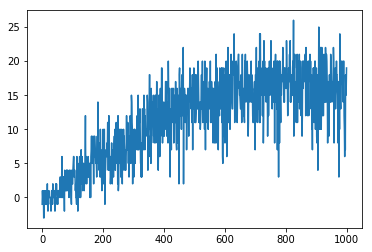

In [9]:
plt.plot(scores)

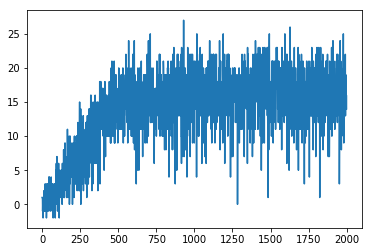

In [46]:
plt.plot(scores)

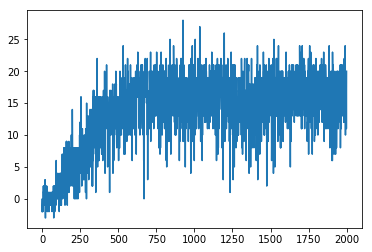

In [11]:
plt.plot(scores)

In [35]:
torch.save(agent.dqn_local.state_dict(), 'dql/models/dueling_dqn_2000_iters.pth')

In [11]:
env.close()

ERROR:root:Exception calling application: 
Traceback (most recent call last):
  File "C:\Users\Johannes\Anaconda3\lib\multiprocessing\connection.py", line 312, in _recv_bytes
    nread, err = ov.GetOverlappedResult(True)
BrokenPipeError: [WinError 109] Putki on lopetettu

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Johannes\Anaconda3\lib\site-packages\grpc\_server.py", line 385, in _call_behavior
    return behavior(argument, context), True
  File "C:\Users\Johannes\Anaconda3\lib\site-packages\unityagents\rpc_communicator.py", line 27, in Exchange
    return self.child_conn.recv()
  File "C:\Users\Johannes\Anaconda3\lib\multiprocessing\connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "C:\Users\Johannes\Anaconda3\lib\multiprocessing\connection.py", line 321, in _recv_bytes
    raise EOFError
EOFError


# Watch the agent play

In [7]:
agent.dqn_local.load_state_dict(torch.load('dql/models/simple_dqn_2000_iters.pth'))

In [11]:
# with graphics
import time
env = UnityEnvironment(file_name="./Banana_Windows_x86_64/Banana.exe")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    time.sleep(float(0.1))
    action = agent.act(state)                      # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Score: 20.0


In [12]:
env.close()

# Training manually

In [13]:
env_info = env.reset()[brain_name]
state = env_info.vector_observations[0] # reset environment for new episode
eps = 0.02

In [45]:
scores = train_dqn(num_episodes=50)

UnityEnvironmentException: No Unity environment is loaded.

In [14]:
action = agent.act(state, eps)
env_info = env.step(action)[brain_name]
next_state = env_info.vector_observations[0]
reward = env_info.rewards[0]
done = env_info.local_done[0]

In [15]:
experiences = agent.memory.sample()

In [16]:
gamma = 1.0

In [17]:
states, actions, rewards, next_states, dones = experiences

In [18]:
experiences

(tensor([[ 0.0000,  0.0000,  1.0000,  ...,  0.3562,  1.2362,  6.7493],
         [ 1.0000,  0.0000,  0.0000,  ...,  0.4667,  2.3544, -1.3549],
         [ 0.0000,  1.0000,  0.0000,  ...,  0.0000,  0.2928, -9.3203],
         ...,
         [ 1.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  2.1588],
         [ 1.0000,  0.0000,  0.0000,  ...,  0.8800,  1.3360, -3.3723],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.2781,  0.0030,  2.5158]]),
 tensor([[3],
         [3],
         [1],
         [1],
         [0],
         [3],
         [1],
         [0],
         [1],
         [3],
         [1],
         [1],
         [2],
         [3],
         [1],
         [0],
         [3],
         [2],
         [3],
         [0],
         [3],
         [1],
         [3],
         [3],
         [1],
         [1],
         [0],
         [1],
         [2],
         [0],
         [2],
         [1],
         [2],
         [2],
         [3],
         [0],
         [2],
         [2],
         [2],
         [1]

In [19]:
q_eval = agent.dqn_target(next_states)

In [21]:
dqn_actions = agent.dqn_local(states).detach().argmax(1).unsqueeze(1)

In [25]:
dqn_values = agent.dqn_target(states).gather(1, dqn_actions)

In [62]:
torch.ones(10, 4) + torch.rand(10,4).mean(1).unsqueeze(1)

tensor([[1.3502, 1.3502, 1.3502, 1.3502],
        [1.7769, 1.7769, 1.7769, 1.7769],
        [1.5467, 1.5467, 1.5467, 1.5467],
        [1.7557, 1.7557, 1.7557, 1.7557],
        [1.8015, 1.8015, 1.8015, 1.8015],
        [1.3229, 1.3229, 1.3229, 1.3229],
        [1.5914, 1.5914, 1.5914, 1.5914],
        [1.4317, 1.4317, 1.4317, 1.4317],
        [1.4559, 1.4559, 1.4559, 1.4559],
        [1.5069, 1.5069, 1.5069, 1.5069]])

In [67]:
torch.ones(10,4) #+ torch.rand(10,4).mean(1).unsqueeze(1)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

# Improving the DQN
Implementing some improvements...